# Solution Planning

## Business Problem

**What is the business problem?**
1. Select the most valuable customers to join the "Loyals" loyalty program.

2. Answering business questions to the marketing team.

### Output

**What will I deliver? / Where does the business team want to see it?**

* 1) List in xls / send by email. It must contain customers who will join Loyals (loyalty program).
    - Format:
   
| client_id | is_loyal |
|-----------|----------|
|1          |yes       |
|2          |no        |

* 2) PDF report answering business questions / send by email and present to the marketing team:
     - Who are the people eligible to participate in the Loyals program?
     - How many customers will be part of the group?
     - What are the main characteristics of these customers?
     - What is the percentage of revenue contribution from Loyals?
     - What is the expected revenue for this group for the coming months?
     - What are the conditions for a person to be eligible for Loyals?
     - What are the conditions for a person to be removed from Loyals?
     - What is the guarantee that the Loyals program is better than the rest of the base?
     - What actions can the marketing team take to increase revenue?

### Input

**Data sources:**
     Dataset "Ecommerce.csv", containing e-commerce sales for the period of one year.

**Tools:**
     Python 3.8.12, Jupyter Notebook, Git, Github.

### Process

**Type of problem:**
Separation of customers by groups.
    
**Main methods:**
    clustering.

**Business Questions:**
* 1) Who are the people eligible to participate in the Loyals program?
    - What does it mean to be eligible? / What are higher "value" customers? (depending on business area)
        - Invoicing:
             - High average ticket
             - High LTV (sum of customer revenue)
             - Low recency (time since last purchase)
             - High basket size (qty products purchased per purchase)
             - Low churn probability (would use the output of a model)
             - High LTV Prediction (would use output from a model)
             - High propensity to buy (would use the output of a model)
        - Cost:
             - Low return rate
        - Shopping experience:
             - High average of the evaluations

 PS: the features will be created in feature engineering.
 
 
* 2) How many customers will be part of the group?
    - Number of customers
    - % in relation to the total number of clients
    
    
* 3) What are the main characteristics of these customers?
    - Write customer characteristics:
        - Age
        - Country
        - Wage
        - Location
     - Write key customer buying behaviors (business metrics)
        - See clustering features (question 1)
         
 For look alike: prospecting similar customers on the internet


* 4) What percentage of revenue contribution comes from Loyals?
    - Calculate the company's total revenue during the year.
    - Calculate the revenue (%) for the Loyals cluster only.
   
   
* 5) What is the expected revenue for this group for the coming months?
    - Loyals LTV calculation (with moving average, time series, arima..)
    - Time Series (ARMA, ARIMA, HoltWinter, etc.)
    - Cohort analysis (with time, location, product..)

 There must be a billing target, consult business.
    
    
* 6) What are the conditions for a person to be eligible for Loyals?
    - Set the evaluation interval (every 1 month, 3 months..)
    - The client's "performance" should be close to the Loyals cluster average.
    
    
* 7) What are the conditions for a person to be removed from Loyals?
    - Customer "performance" is no longer closer to the Loyals cluster average.
   
   
* 8) What is the guarantee that the Loyals program is better than the rest of the base?
    - A/B test
    - Hypothesis test


* 9) What actions can the marketing team take to increase revenue?
    - Discount
    - Purchase preference
    - Cheaper shipping
    - Visit the company
    - Offer personal stylist
    - Recommend cross selling
    - Offer exclusive content

## Solution Benchmarking

### Desk Research

Reading articles on customer segmentation on the internet to understand what the market is doing.

Identify from market solutions, with the business team, what we can do as an MVP.

1. RFM segmentation model.

# Environment Preparation

## Imports

In [147]:
import pandas            as pd
import seaborn           as sns
import datetime          as dt
import umap.umap_        as umap

from matplotlib               import pyplot as plt
from tabulate                 import tabulate
from IPython.core.display     import HTML
from sklearn                  import cluster as c
from sklearn                  import metrics as m
from yellowbrick.cluster      import KElbowVisualizer, SilhouetteVisualizer
from plotly                   import express as px
#from IPython.display         import Image

## Helper Functions

In [148]:
def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
    sns.set()
jupyter_settings()

# Data Collection

In [149]:
#read data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='unicode_escape')

In [150]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [151]:
df_raw = df_raw.drop('Unnamed: 8', axis=1).copy()
df_raw.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
39908,539715,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,1,19-Dec-16,1.25,NaN,United Kingdom
242573,558358,23300,GARDENERS KNEELING PAD CUP OF TEA,1,26-Jun-17,1.65,17965.0,United Kingdom
47769,540418,20854,BLUE PATCH PURSE PINK HEART,3,5-Jan-17,1.66,NaN,United Kingdom


# Data Description

In [152]:
df1 = df_raw.copy()

## Rename Columns

In [153]:
df1.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279456,561324,22398,MAGNETS PACK OF 4 SWALLOWS,12,24-Jul-17,0.39,14414.0,United Kingdom
151669,549564,22358,KINGS CHOICE TEA CADDY,6,8-Apr-17,2.95,18129.0,United Kingdom
375304,569457,21354,TOAST ITS - BEST MUM,1,2-Oct-17,1.25,14606.0,United Kingdom


In [154]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [155]:
df1.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

## Feature Description 

In [156]:
# Explain feature meanings
tab_meanings = [['Columns', 'Meaning'],
        ['invoice_no', 'unique identifier of each transaction'],
        ['stock_code', 'item code'],
        ['description', 'item name'],
        ['quantity', 'quantity of each item purchased per transaction'],
        ['invoice_date', 'the day the transaction took place'],
        ['unit_price', 'product price per unit'],
        ['customer_id', 'unique customer identifier'],
        ['country', 'customer\'s country of residence']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='simple'))

Columns       Meaning
------------  -----------------------------------------------
invoice_no    unique identifier of each transaction
stock_code    item code
description   item name
quantity      quantity of each item purchased per transaction
invoice_date  the day the transaction took place
unit_price    product price per unit
customer_id   unique customer identifier
country       customer's country of residence


In [157]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
334237,566235,82494L,WOODEN FRAME ANTIQUE WHITE,12,9-Sep-17,2.95,15636.0,United Kingdom
58395,541240,22469,HEART OF WICKER SMALL,15,14-Jan-17,1.65,16206.0,United Kingdom
441973,574660,22650,CERAMIC PIRATE CHEST MONEY BANK,1,4-Nov-17,1.45,15407.0,United Kingdom


## Data Dimensions

In [158]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check NA

In [160]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [161]:
#remove rows with NA
df1 = df1.dropna( subset=['description','customer_id'] )

In [162]:
print (f'Removed data: { 1-(df1.shape[0] / df_raw.shape[0]):.2f}%')

Removed data: 0.25%


In [163]:
df1.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France


In [164]:
#reset index
df1 = df1.reset_index(drop=True)

In [165]:
#new num of rows
df1.shape

(406829, 8)

In [166]:
#check
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change Types

In [167]:
#correct data types ensure correct calculations using the columns on next sessions

In [168]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [169]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
323245,573576,84970S,HANGING HEART ZINC T-LIGHT HOLDER,4,29-Oct-17,2.08,14096.0,United Kingdom
192835,560544,21042,RED RETROSPOT APRON,3,17-Jul-17,5.95,12569.0,Germany
342057,575574,21899,GARAGE KEY FOB,2,8-Nov-17,0.65,14606.0,United Kingdom


In [170]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

In [171]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [172]:
# invoice_no
#df1['invoice_no'] = df1['invoice_no'].astype(int)
#there are letters on invoice, so let it like object(string). Ex: 'C536379', 'C554197'

In [173]:
# stock_code
#df1['stock_code'] = df1['stock_code'].astype(int)
#there are letters on stock_code, so let it like object(string). Ex: '85123A', '84406B'

In [174]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
265934,C568445,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,-1,2017-09-25,9.95,16156,United Kingdom
337416,575017,22988,SOLDIERS EGG CUP,2,2017-11-06,1.25,17219,United Kingdom
138470,553828,21181,PLEASE ONE PERSON METAL SIGN,8,2017-05-17,2.10,17865,United Kingdom


In [175]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Statistics

In [176]:
#pass on first cycle
pass

# Feature Engeneering

## Feature Creation

In [177]:
#save dataset
df1.to_csv("../data/interim/cycle2/df1_data_description_done.csv")

In [178]:
df2 = pd.read_csv("../data/interim/cycle2/df1_data_description_done.csv", index_col=0, parse_dates=['invoice_date'])
df2.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
96851,548533,21564,PINK HEART SHAPE LOVE BUCKET,12,2017-03-29,2.95,13883,United Kingdom
180707,559123,21744,SNOWFLAKE PORTABLE TABLE LIGHT,1,2017-07-04,2.95,17341,United Kingdom
161713,556726,22189,CREAM HEART CARD HOLDER,324,2017-06-12,2.31,18102,United Kingdom


In [180]:
# our current granularity is: stock_code + invoice_date
# we need to have customer as granularity, to have is's features on a new table.
# let's start adjusting the dataset to build an RFM Segmentation Model (Recency, Frequency, Monetary Value)

In [181]:
#get first customer as sample
df2.loc[ df2['invoice_no'] == '536365']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2016-11-29,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2016-11-29,4.25,17850,United Kingdom


In [182]:
#create the referente table with uniques customer_id (and reset index)
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True).copy()

In [183]:
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [39]:
#let's now create the 3 variables needed to use the RFM Segmentation Model 

In [184]:
# Gross Revenue: (quantity * price of each purchase)
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']
df_monetary = df2[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# Recency: number of days since last purchase
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# Frequency (number of purchases)
df_freq = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')
#check NAs
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
dtype: int64

In [186]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


### average ticket

In [187]:
#new var: average_ticket
# average gross revenue customers spend on all purchases
df_avg_ticket = df2[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


In [188]:
#check NAs
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
dtype: int64

# Variable Filtering

In [192]:
df2.to_csv("../data/interim/cycle2/df2_feature_engineering_done.csv")
df_ref.to_csv("../data/interim/cycle2/df_ref_done.csv")

In [193]:
#df3 = df_ref
df3 = pd.read_csv("../data/interim/cycle2/df_ref_done.csv", index_col=0)
df3.dtypes

customer_id        int64
gross_revenue    float64
recency_days       int64
invoice_no         int64
avg_ticket       float64
dtype: object

In [194]:
#three needed vars created, no filtering needed
pass

# EDA

In [195]:
#pass by now
df4 = df3.copy()

# Data Preparation

In [196]:
#pass by now
df5 = df4.copy()

# Feature Selection

In [197]:
#pass by now
df6 = df5.copy()

# Hyperparameter Fine-Tuning

In [198]:
#drop customer_id
X = df6.drop('customer_id', axis=1).copy()
X.head()
#agora, temos 4 variáveis:

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5288.63,302,35,16.950737
1,3079.10,31,18,15.709694
2,7187.34,2,18,28.634821
3,948.25,95,5,33.866071
4,635.10,330,6,105.850000


For a good clustering, we need clusters to have two properties:

- Compactness: smallest possible distance between the points of the same cluster.
- Separation: greatest possible distance between the points of different clusters.

Let's use k-means with 2 metrics: 

1 - Within-Cluster Sum of Square (WSS) - calculates Compactness 

2 - Silhouette Score (SS) - calculates Compactness and Separation

 


## Within-Cluster Sum of Square (WSS)

In [199]:
#up to 7 possible clusters now
clusters = [2, 3, 4, 5, 6, 7]

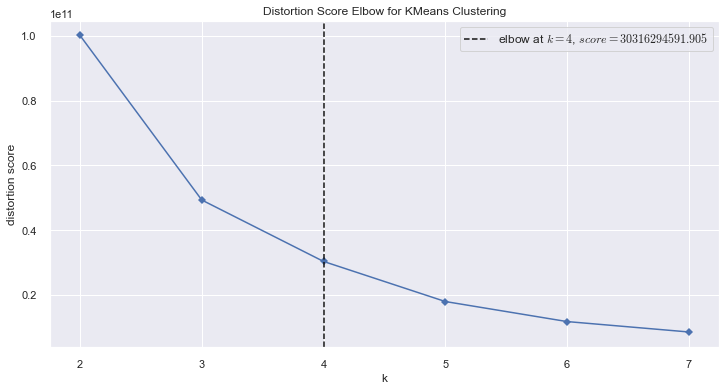

In [200]:
#let's use yellowbrick library, that inherits some functions from sklearn, and makes it easier to use performance metrics like WSS and SS
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False )
kmeans.fit(X)
kmeans.show();
#it will sugest the number of clusters (dotted lines)

In [1]:
#The smaller the WSS, the smaller the sum of the distances within the clusters, which means that the points are closer to their centroid, so the cluster is more compact!

#even though with more cluster (5, 6, 7), we would have (a bit) more condensed clusters, the optimized number of clusters according to WSS is now 4.

#we had 3 clusters sugested on first cycle, but now with 4 variables, the scenario changed.

## Silhouette Score

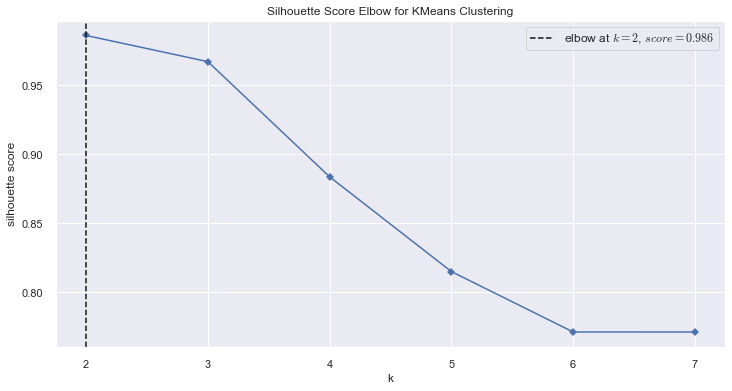

In [201]:
#calculate silhouette score also with yellowbrick library
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit(X)
kmeans.show();

In [202]:
#being SS=1 the best clustering result:
    # with 2 clusters, the result is 0.99 (awesome)
    # with 3 clusters, it is 0,96 (awesome)
    # with 4, or 5, we still have SS > 0.8, it's still very good!

#according to SS, the ideal cluster number is 2, but for business porposes, it's interesting to have at least 3 groups of customers, to be able to put actions on each of them. 

# Silhouette Analysis

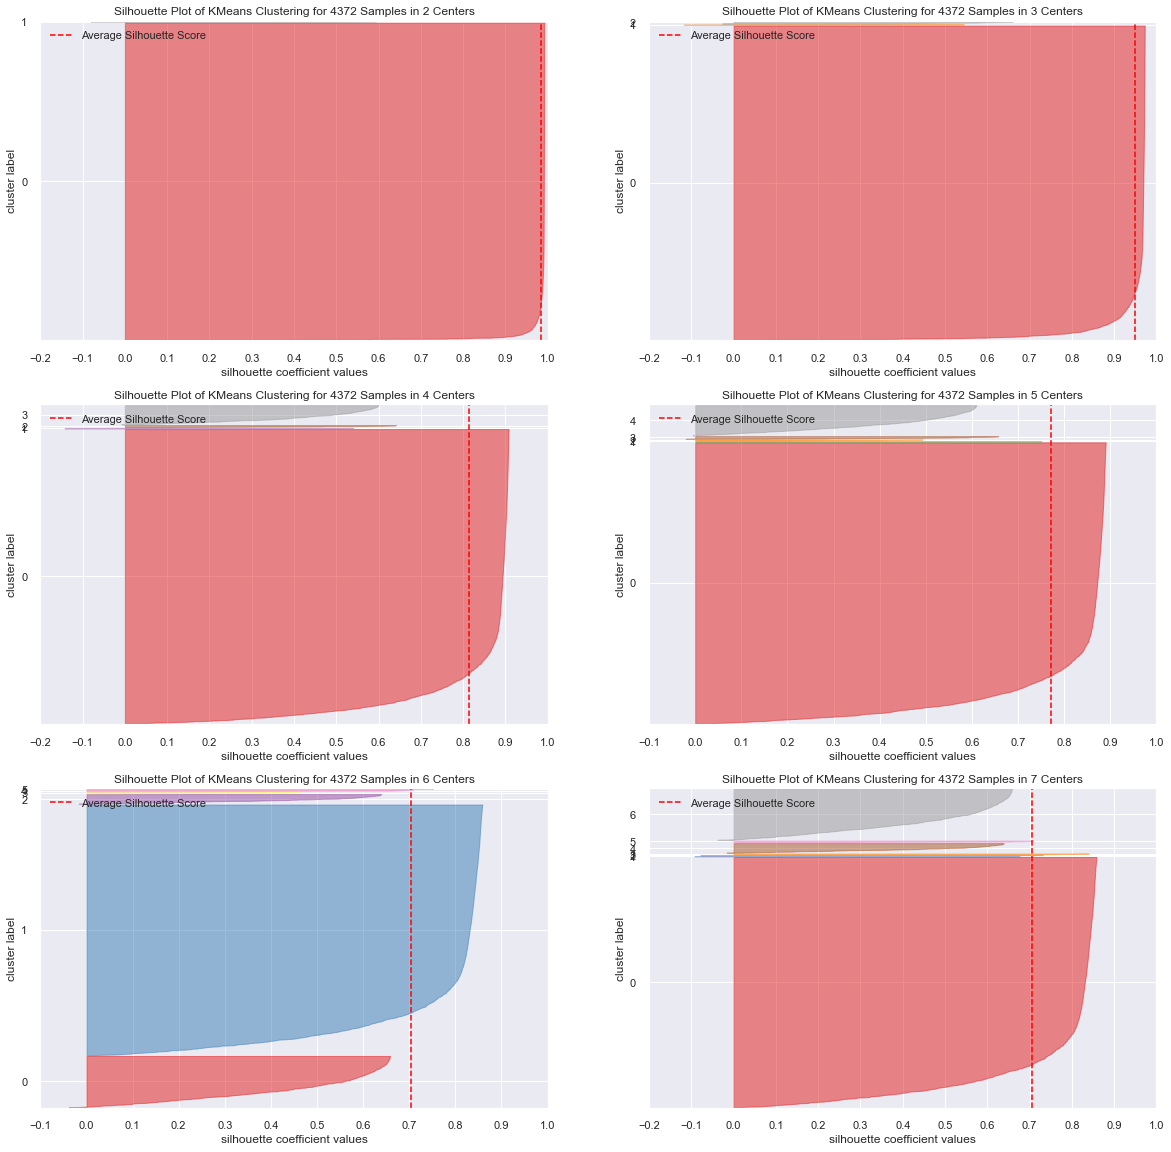

In [208]:
fig, ax = plt.subplots(3, 2, figsize=(20,20))
for k in clusters:
    #run kmeans
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    #build positions to plot
    q, mod = divmod(k, 2)
    #plot silhouette
    visualizer = SilhouetteVisualizer(km, color='yellowbrick', ax=ax[q-1][mod])
    #plot silhouette analysis
    visualizer.fit(X)
    visualizer.finalize() #centers = clusters

In [ ]:
#with our features, our data is too grouped, and it's generating a cluster too big! It's absorving other minors.
#so, we can't define the best number of clusters by now. 
#But for this second cycle, let's keep on with k=4, as the SS sugested

# Model Training

## K-Means

In [219]:
# Let's then continue with the projectand train the k-means model with 4 clusters.

#model definition
k = 4
kmeans = c.KMeans( init='random', #init centroids ramdomly
                  n_clusters=k, #3
                  n_init=10, #Num of times k-means will be run with different centroid seeds.
                  max_iter=300, #up to 300 times
                 random_state=42) #seed, to generate the same random init
#model training
kmeans.fit(X)

#get cluster of each row
labels = kmeans.labels_

## Cluster Validation

In [220]:
#Metric: WSS (Within-cluster sum of square)

#this method of k-means (sklearn) returns the WSS
print(f'WSS Value: {kmeans.inertia_}')

WSS Value: 40056506734.60243


In [221]:
#Metric: SS (Silhouette Score)

#this method of k-means (sklearn) returns the SS
print(f'SS Value: {m.silhouette_score(X, labels, metric="euclidean")}')

SS Value: 0.8139972028952444


In [222]:
#the result for 4 clusters of SS=0.81 is in theory great!
#but, as can be seen on Silhouette Analysis, with 4 cluster, we have 1 that represents almost all data! 
#So, thats obvious it will perform well, because is't almost all the data of the dataset.

# Cluster Analysis

In [223]:
df9 = df6.copy()
#create a cluster column with labels of it's cluster from k-means, to be able to plot colored clusters
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


## Visualization Inspection

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


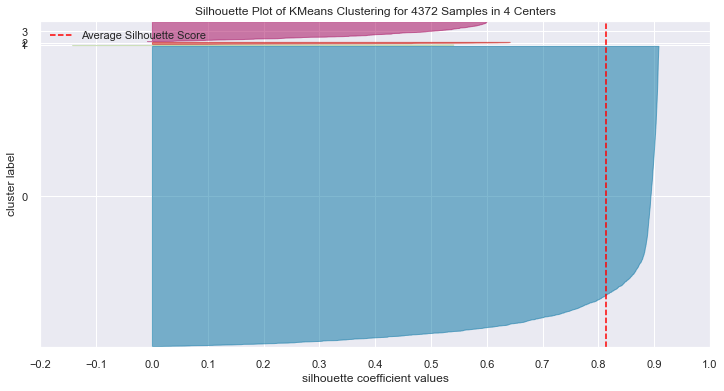

In [224]:
#there is no way to plot more than 3D charts, so let's use the Silhouette Plot
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 2d Plot

In [225]:
#chech wich features are messing up with the clustering, but it's not good do take a decision just looking at the plot, because two "bad" features combined, can turn into a "good" feature
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


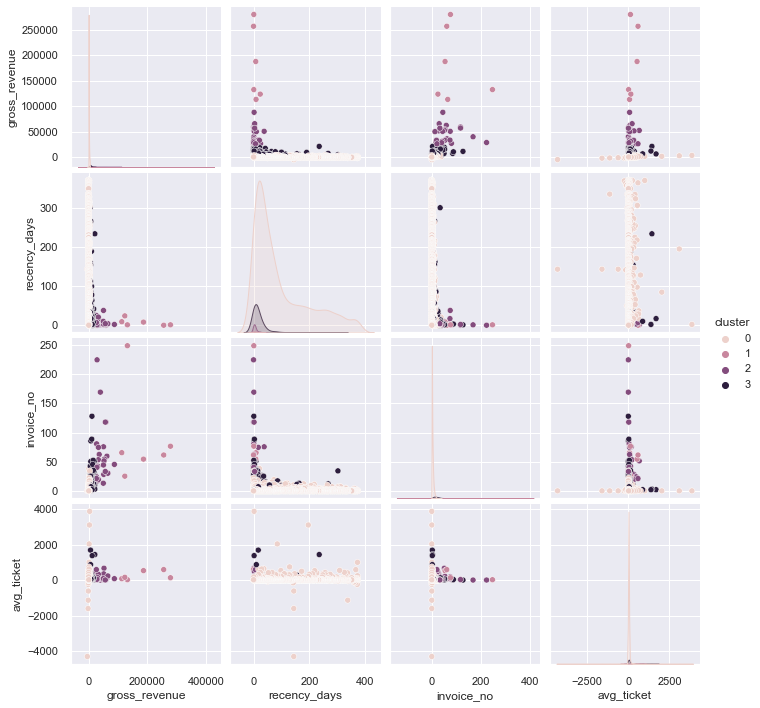

In [228]:
#plot pairplot to try to see patterns
df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

## UMAP

In [229]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5288.63,302,35,16.950737
1,3079.10,31,18,15.709694
2,7187.34,2,18,28.634821
3,948.25,95,5,33.866071
4,635.10,330,6,105.850000


/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

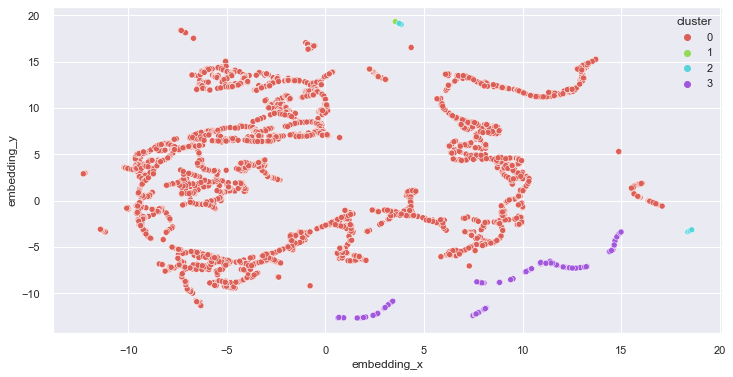

In [231]:
#n_neighbors=5

#reducer: high dimensionality projection
reducer = umap.UMAP( n_neighbors=5, #bigger: global structures, smaller: local structures (like a zoom!)
                    random_state=42 )
#fit variables in high dimensionality (x), projecting them in low dimensionality, generating the enbedding space
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0] #component 1
df_viz['embedding_y'] = embedding[:, 1] #component 2

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', #cluster color
                 palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),# formula to get the number of clusters automatically)
                 data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

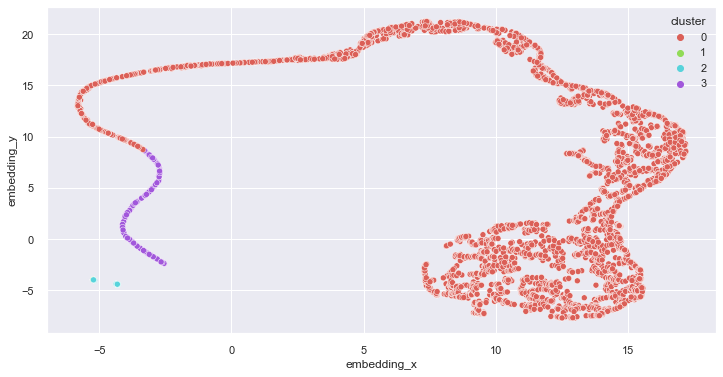

In [234]:
#n_neighbors=15
reducer = umap.UMAP( n_neighbors=15, random_state=42 )
embedding = reducer.fit_transform( X )
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

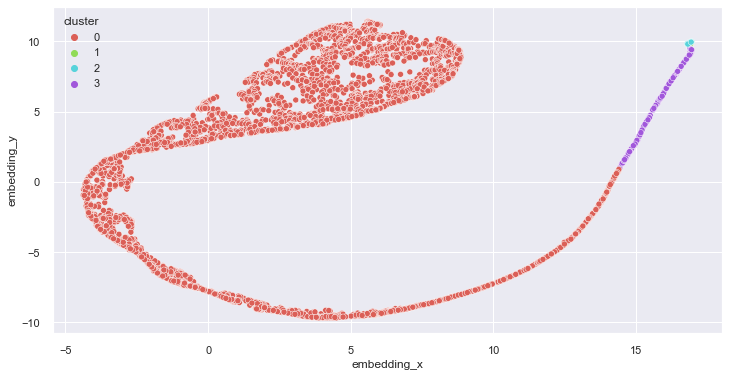

In [235]:
#n_neighbors=80
reducer = umap.UMAP( n_neighbors=80, random_state=42 )
embedding = reducer.fit_transform( X )
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

In [ ]:
#Clustering is good looking at umap, but it's because more than 90% of it is one big cluster, so let's work on data on next cycles to improve this.

## t-SNE

In [236]:
#next cycles
pass

## Cluster Profile

In [237]:
#using 4 metrics, with avg_ticket to represent the centroid of the group (mean), let's understand who are the people inside each cluster

In [238]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


In [241]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = df_cluster['customer_id'] / df_cluster['customer_id'].sum()*100
# Agg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')
# Avg recency days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')
# Avg invoice number
df_avg_invoice_no = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')
# Avg ticket
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how='inner', on='cluster')
# cluster profiles
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,4071,93.115279,946.696250,96.969295,3.641120,25.359654
1,1,6,0.137237,182181.981667,7.166667,89.000000,253.626345
2,2,28,0.640439,42614.387143,6.178571,57.821429,162.862605
3,3,267,6.107045,8089.028652,20.280899,19.528090,62.783157


In [242]:
#generate the repport dinamically:
for i in range(len(df_cluster['customer_id'])):
    print(f""" Cluster {df_cluster['cluster'][i]}:
    -Number of customers: {df_cluster['customer_id'][i]} ({round(df_cluster['perc_customer'][i],1)}%)
    -Average revenue: ${round(df_cluster['gross_revenue'][i])}
    -Average recency: by each {round(df_cluster['recency_days'][i])} days ({round(df_cluster['recency_days'][i]/7)} week(s))
    -Average purchases: {round(df_cluster['invoice_no'][i])}  
    -Average ticket: ${round(df_cluster['avg_ticket'][i])} \n """)

 Cluster 0:
    -Number of customers: 4071 (93.1%)
    -Average revenue: $947
    -Average recency: by each 97 days (14 week(s))
    -Average purchases: 4  
    -Average ticket: $25 
 
 Cluster 1:
    -Number of customers: 6 (0.1%)
    -Average revenue: $182182
    -Average recency: by each 7 days (1 week(s))
    -Average purchases: 89  
    -Average ticket: $254 
 
 Cluster 2:
    -Number of customers: 28 (0.6%)
    -Average revenue: $42614
    -Average recency: by each 6 days (1 week(s))
    -Average purchases: 58  
    -Average ticket: $163 
 
 Cluster 3:
    -Number of customers: 267 (6.1%)
    -Average revenue: $8089
    -Average recency: by each 20 days (3 week(s))
    -Average purchases: 20  
    -Average ticket: $63 
 


In [ ]:
#there is more than 93% of my customers in one cluster (0), so we need to work on data cleaning and features to improve this on next cycle.

# Deploy

In [145]:
#in the future